In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

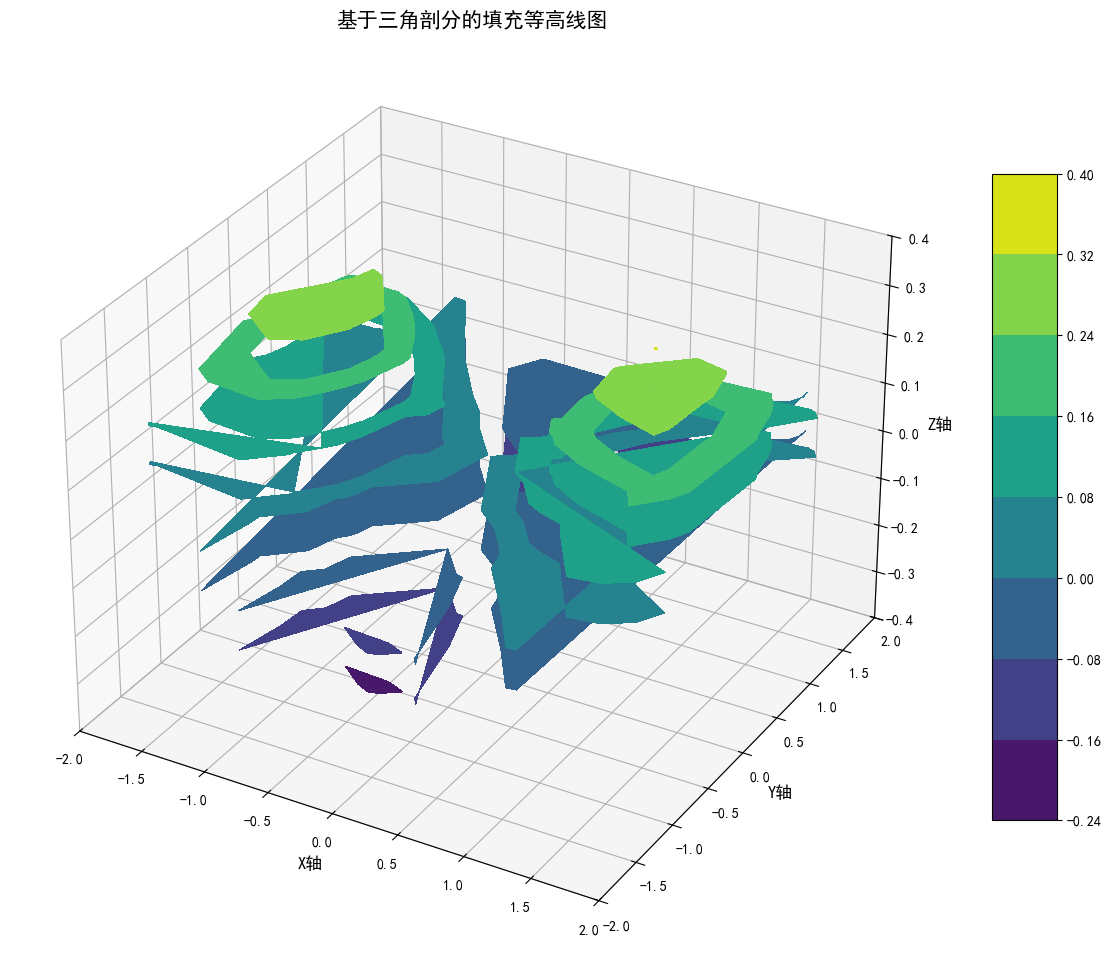

In [3]:
from matplotlib.tri import Triangulation

# 生成数据
np.random.seed(42)
n_points = 200
X = np.random.uniform(-3, 3, n_points)
Y = np.random.uniform(-3, 3, n_points)
Z = np.sin(0.5 * X**2 - 0.25 * Y**2) * np.exp(-0.5 * (X**2 + Y**2))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# 创建三角剖分
triang = Triangulation(X, Y)

# 绘制基于三角剖分的填充等高线图 
surf = ax.tricontourf(triang,            # 创建的三角剖分结果
                      Z,                 # Z值
                      cmap='viridis',    # 颜色映射
                      axlim_clip=True    # 数据裁剪：等高线图被限制在坐标轴范围内
                     )

# 设置坐标轴标签
ax.set_xlabel('X轴', fontsize=12)
ax.set_ylabel('Y轴', fontsize=12)
ax.set_zlabel('Z轴', fontsize=12)

# 设置坐标轴范围
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-0.4, 0.4)

# 添加颜色条
plt.colorbar(surf, ax=ax, shrink=0.7, aspect=10)

ax.set_title('基于三角剖分的填充等高线图', fontsize=15)
plt.show()

# 2、使用示例：

### 示例 1：多方向投影

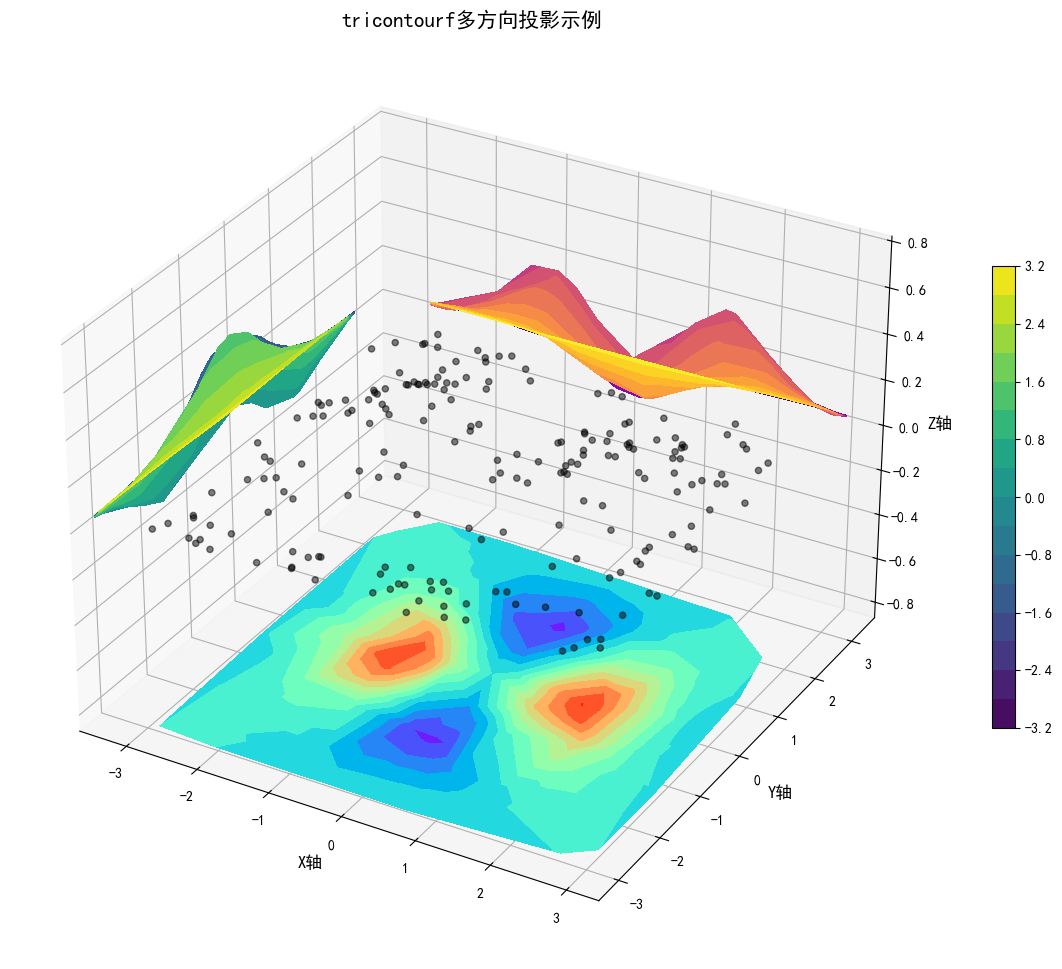

In [4]:
# 生成数据
np.random.seed(42)
n_points = 200
X = np.random.uniform(-3, 3, n_points)
Y = np.random.uniform(-3, 3, n_points)
Z = np.sin(0.5 * X**2 - 0.25 * Y**2) * np.exp(-0.5 * (X**2 + Y**2))

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# 绘制原始数据点
scatter = ax.scatter(X, Y, Z, c='black', alpha=0.5, s=20)

# 1. 向XY平面投影 (z方向)
# 设置投影位置在Z的最小值下方
z_offset = Z.min() - 0.2
contour_z = ax.tricontourf(X, Y, Z, zdir='z', offset=z_offset - 0.5, 
                          cmap='rainbow', levels=15)

# 2. 向XZ平面投影 (y方向)
# 设置投影位置在Y的最大值右侧
y_offset = Y.max() + 0.2
contour_y = ax.tricontourf(X, Y, Z, zdir='y', offset=y_offset + 0.5, 
                          cmap='plasma', levels=15)

# 3. 向YZ平面投影 (x方向)
# 设置投影位置在X的最小值左侧
x_offset = X.min() - 0.2
contour_x = ax.tricontourf(X, Y, Z, zdir='x', offset=x_offset - 0.5, 
                          cmap='viridis', levels=15)

# 添加颜色条
plt.colorbar(contour_x, ax=ax, shrink=0.5, aspect=20)

ax.set_xlim(x_offset - 0.5, X.max() + 0.5)
ax.set_ylim(Y.min() - 0.5, y_offset + 0.5)
ax.set_zlim(z_offset - 0.5, Z.max() + 0.5)
ax.set_xlabel('X轴', fontsize=12)
ax.set_ylabel('Y轴', fontsize=12)
ax.set_zlabel('Z轴', fontsize=12)
ax.set_title('tricontourf多方向投影示例', fontsize=15)

plt.show()